# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [264]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

> Carregando as bases de dados para train e test com as variáveis explicativas e resposta já separadas

In [206]:
X_train = pd.read_csv('./X_train.csv',index_col=[0,1])
print(X_train.shape)
X_train.head(3)

(7352, 561)


,,"('tBodyAcc-mean()-X',)","('tBodyAcc-mean()-Y',)","('tBodyAcc-mean()-Z',)","('tBodyAcc-std()-X',)","('tBodyAcc-std()-Y',)","('tBodyAcc-std()-Z',)","('tBodyAcc-mad()-X',)","('tBodyAcc-mad()-Y',)","('tBodyAcc-mad()-Z',)","('tBodyAcc-max()-X',)",...,"('fBodyBodyGyroJerkMag-meanFreq()',)","('fBodyBodyGyroJerkMag-skewness()',)","('fBodyBodyGyroJerkMag-kurtosis()',)","('angle(tBodyAccMean,gravity)',)","('angle(tBodyAccJerkMean),gravityMean)',)","('angle(tBodyGyroMean,gravityMean)',)","('angle(tBodyGyroJerkMean,gravityMean)',)","('angle(X,gravityMean)',)","('angle(Y,gravityMean)',)","('angle(Z,gravityMean)',)"
order,subject,,,,,,,,,,,,,,,,,,,,,
1,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
2,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
3,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


In [207]:
X_test = pd.read_csv('./X_test.csv',index_col=[0,1])
X_test.columns = df_columns
print(X_test.shape)
X_test.head(3)

(2947, 561)


,,"(tBodyAcc-mean()-X,)","(tBodyAcc-mean()-Y,)","(tBodyAcc-mean()-Z,)","(tBodyAcc-std()-X,)","(tBodyAcc-std()-Y,)","(tBodyAcc-std()-Z,)","(tBodyAcc-mad()-X,)","(tBodyAcc-mad()-Y,)","(tBodyAcc-mad()-Z,)","(tBodyAcc-max()-X,)",...,"(fBodyBodyGyroJerkMag-meanFreq(),)","(fBodyBodyGyroJerkMag-skewness(),)","(fBodyBodyGyroJerkMag-kurtosis(),)","(angle(tBodyAccMean,gravity),)","(angle(tBodyAccJerkMean),gravityMean),)","(angle(tBodyGyroMean,gravityMean),)","(angle(tBodyGyroJerkMean,gravityMean),)","(angle(X,gravityMean),)","(angle(Y,gravityMean),)","(angle(Z,gravityMean),)"
order,subject,,,,,,,,,,,,,,,,,,,,,
1,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
2,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
3,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346


In [208]:
y_test = pd.read_csv('./y_test.txt',header=None)
y_test.head(3)

,0
0,5
1,5
2,5


In [209]:
y_train = pd.read_csv('./y_train.txt', header=None)
y_train.head(3)

,0
0,5
1,5
2,5


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [210]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=42)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [211]:
%%time
tree = DecisionTreeClassifier(random_state=42,max_depth = 4).fit(X_train, y_train)

CPU times: total: 1.66 s
Wall time: 2.78 s


In [231]:
# construindo uma tabela com as 3 variáveis e seu valor de importancia

x =  pd.DataFrame(data = {'var':pd.Series(tree.feature_names_in_), 'importancia':pd.Series(tree.feature_importances_)})
y = x.sort_values(by = 'importancia', ascending=False)[:3]
y

,var,importancia
52,"('tGravityAcc-min()-X',)",0.285303
389,"('fBodyAccJerk-bandsEnergy()-1,16',)",0.254091
41,"('tGravityAcc-mean()-Y',)",0.164608


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [215]:
%%time
#construindo a árvore a partir das três vairáveis mais importantes

caminho = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train[x['var']], y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: total: 15.6 ms
Wall time: 50.2 ms


In [217]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_train[x['var']], y_train)
    clfs.append(clf)

CPU times: total: 8.61 s
Wall time: 11.1 s


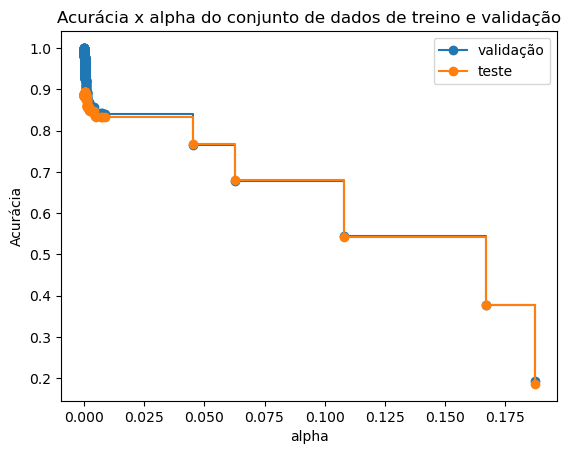

In [219]:
train_scores = [clf.score(X_train[x['var']], y_train) for clf in clfs]
valid_scores = [clf.score(X_valid[x['var']], y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [220]:
# encontrando o melhor ccp_alpha a partir da base de validação

ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 89.45


DecisionTreeClassifier(ccp_alpha=0.0002845570582240876, random_state=42)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

> **Aqui, eu não sabia se deveria usar somente as 3 variáveis ou todas, logo, rodei duas avaliações**

In [276]:
X_test.iloc[:,[52,389,41]].head(1)

,,"(tGravityAcc-min()-X,)","(fBodyAccJerk-bandsEnergy()-1,16,)","(tGravityAcc-mean()-Y,)"
order,subject,,,
1,2,0.944461,-0.99804,-0.282719


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Acurácia: 68.51


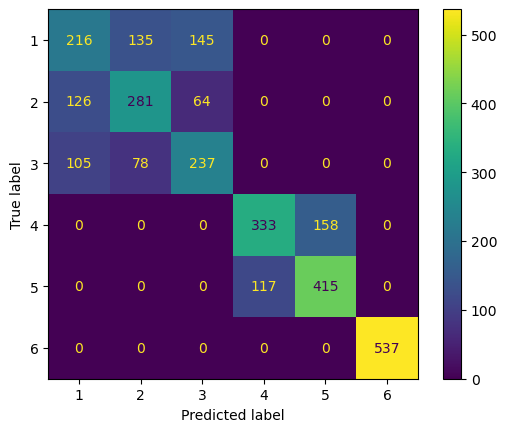

In [274]:
# avaliando o modelo a partir das 3 variáveis
# não sei ao certo pq, mas as colunas corretas não eram selecionadas usando a indexação [x['var']] como para as df passadas.
# daí selecionei as colunas baseado no iloc e na posição de cada uma

acuracia_teste = melhor_arvore.score(X_test.iloc[:,[52,389,41]], y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')

predictions = melhor_arvore.predict(X_test.iloc[:,[52,389,41]])

cm = confusion_matrix(y_test, predictions, labels=melhor_arvore.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=melhor_arvore.classes_)
disp.plot()

plt.show()

## Conclusão preliminar

- É possível afirmar que a acurácia da ávore está baixa, mesmo realizadas as podas e adequações de ccp_alpha.
- A única classificação com 100% de acurácia é da  categoria 6.
- Nas categorias 1 - 5, o modelo consegui prever com uma acurácia alta, em sua maioria acima de 50%.

In [275]:
# tentei roda o modelo usando todas as features de teste. 
# mas como o modelo foi fitado com apenas as 3 variáveis mais importantes, ocorreu um erro justificável.

acuracia_teste1 = melhor_arvore.score(X_test, y_test)

print(f'Acurácia: {acuracia_teste1*100:.2f}')

predictions1 = melhor_arvore.predict(X_test)

cm1 = confusion_matrix(y_test, predictions1, labels=melhor_arvore.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=melhor_arvore.classes_)
disp1.plot()

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 561 features, but DecisionTreeClassifier is expecting 3 features as input.